In [ ]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

Mounted at /content/drive


In [ ]:
import os

project_path = 'drive/MyDrive/Сертификат/news-dataset/'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tqdm import tqdm
import pandas as pd
import re
all_lemmas = []
for train_idx in ['1', '2', '3', '4']:
    c = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/{train_idx}.tsv",delimiter='\t')
    sentence_lemmas=[]
    prev_doc_id = c.values[0][0]
    for el in  tqdm(c.values):
        lemma = el[3]
        if el[1]=="\n":
            continue
        if el[0]!=prev_doc_id:
            all_lemmas.append((prev_doc_id, sentence_lemmas))
            sentence_lemmas=[]
            prev_doc_id=el[0]
        else:
            if type(lemma) == str:
                lemma_filtered = re.sub(r'[^\w\s]','', lemma)
                if len(lemma_filtered)==0 or lemma_filtered in stops:
                    continue
                sentence_lemmas.append(lemma_filtered.lower())


100%|██████████| 1391726/1391726 [00:04<00:00, 331331.28it/s]


In [ ]:
N = len(all_lemmas)

In [ ]:
all_words = [el for sentence in all_lemmas for el in sentence[1]]

In [ ]:
len(all_words)

3191746

In [ ]:
from collections import Counter
word_cnt = Counter(all_words)

In [ ]:
len(word_cnt)

79102

In [ ]:
word_cnt = Counter({k: c for k, c in word_cnt.most_common(8192)})

In [ ]:
word_cnt

Counter({'39': 44435,
         'the': 25614,
         'new': 20359,
         'said': 20264,
         'ha': 18732,
         'reuters': 17263,
         'us': 17167,
         'ap': 16171,
         'wa': 13613,
         'lt': 13181,
         'gt': 13174,
         'a': 13160,
         'year': 10588,
         'quot': 9546,
         'company': 9429,
         'first': 8925,
         'two': 8676,
         'monday': 7567,
         'wednesday': 7485,
         'world': 7480,
         'tuesday': 7401,
         'thursday': 7285,
         'one': 7191,
         'friday': 6783,
         'inc': 6730,
         'game': 6586,
         'say': 6427,
         'week': 6406,
         'b': 6375,
         'oil': 6373,
         'last': 6311,
         'york': 6151,
         'yesterday': 6047,
         'million': 6023,
         'price': 5910,
         'president': 5851,
         'iraq': 5580,
         'day': 5268,
         'stock': 5230,
         'time': 5174,
         'group': 5100,
         'plan': 5085,
         

In [ ]:
import json
with open("tokens_freq.json", "w") as file:
    json.dump(word_cnt, file)

In [ ]:
def create_term_document_matrix(documents, token_freq):
    matrix = []
    token_freq = list(token_freq.keys())
    for doc in tqdm(documents[:60000]):
        tokens = doc[1]
        tokens_cnt = Counter(tokens)
        row = [tokens_cnt[token.lower()] for token in token_freq]
        matrix.append(row)

    return matrix

In [ ]:
len(word_cnt)

8192

In [ ]:
len(all_lemmas)

119996

In [ ]:
term_doc_matrix = create_term_document_matrix(all_lemmas,word_cnt)

100%|██████████| 6000/6000 [00:16<00:00, 360.00it/s]


In [ ]:
import json
with open("term_document_matrix.json", "w") as file:
    json.dump(term_doc_matrix, file)

In [ ]:
import gc
gc.collect()

32

In [ ]:
# Перезагрузочка
import numpy as np

In [ ]:
import json
with open("drive/MyDrive/Сертификат/news-dataset/assets/tokens_freq.json", "r") as file:
    word_cnt = json.load(file)

In [ ]:
word_cnt

In [ ]:
#import json
#with open("term_document_matrix.json", "r") as file:
#    term_doc_matrix = json.load(file)

In [ ]:
term_doc_matrix = np.array(term_doc_matrix)

In [ ]:
term_doc_matrix.shape

(60000, 8192)

In [ ]:
from math import log
from tqdm import tqdm
IDF = {}
terms = list(word_cnt.keys())
for i in tqdm(range(len(terms))):
    IDF[i] = log( (1+N) / (1+np.count_nonzero(term_doc_matrix[:,i]) ))

100%|██████████| 8192/8192 [00:07<00:00, 1028.23it/s]


In [ ]:
term_doc_matrix[0].shape

(8192,)

In [ ]:
def compute_tf_idf(term_document_matrix, terms):
    tf_idf_matrix = []
    for document in tqdm(term_document_matrix):
        tf_idf_row=[]
        for i in range(len(terms)):
            tf = document[i]
            tf_idf_row.append(tf * IDF[i])
        tf_idf_matrix.append(tf_idf_row)

    return tf_idf_matrix

In [ ]:
tf_idf_matrix = compute_tf_idf(term_doc_matrix[:10000], terms)

100%|██████████| 10000/10000 [02:55<00:00, 57.10it/s]


In [ ]:
tf_idf_matrix_np = np.array(tf_idf_matrix)

In [ ]:
tf_idf_matrix_np.shape

(10000, 8192)

In [ ]:
vec = tf_idf_matrix[0]
print(vec)

[0.0, 0.0, 2.9638856609185296, 0.0, 0.0, 6.208813380329653, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3799002460741105, 0.0, 0.0, 0.0, 3.1349693405749934, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.409456600937348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.350716937861157, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.275242097789842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
# 3

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=[el[1] for el in all_lemmas[:]], vector_size=256, window=5, min_count=1, workers=14)
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")

In [ ]:
model.train([el[1] for el in all_lemmas[:]], total_examples=len(all_lemmas[:]), epochs=100)

(308596042, 319174600)

In [ ]:
from scipy.spatial import distance
1 - distance.cosine(model.wv["winter"], model.wv["summer"])

0.2851293683052063

In [ ]:
np.dot(model.wv["winter"], model.wv["summer"])/(np.linalg.norm(model.wv["winter"])*np.linalg.norm(model.wv["summer"]))

0.28512937

In [ ]:
import math
def cosine_similarity(v1,v2):
    dot_product, norm1, norm2 = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        dot_product+=x*y
        norm1 += x*x
        norm2 += y*y
    norm1 = math.sqrt(norm1)
    norm2 = math.sqrt(norm2)
    return dot_product/(norm1*norm2)

In [ ]:
cosine_similarity(model.wv["winter"], model.wv["summer"])

0.2851293612287475

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=512)
tf_idf_matrix_np_transformed = pca1.fit_transform(tf_idf_matrix_np.T)

In [ ]:
from sklearn.decomposition import PCA
words = list(model.wv.key_to_index)
X = [model.wv[word] for i, word in enumerate(words)]
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

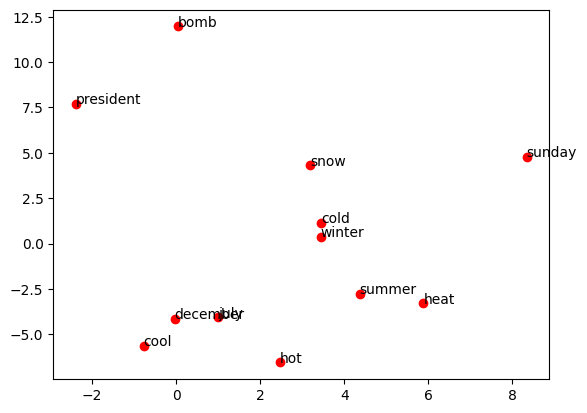

In [ ]:
for word in ['winter',"snow","summer","hot","cold","bomb","president","cool","heat","sunday","december","july"]:
    vec = model.wv[word]
    x,y = pca.transform(vec.reshape(1, -1))[0][0], pca.transform(vec.reshape(1, -1))[0][1]
    plt.plot(x,y, 'o', color='red')
    plt.annotate(word, (x, y))

In [ ]:
tf_idf_matrix_np = np.array(tf_idf_matrix)

In [ ]:
tf_idf_matrix_np #tf_idf_matrix_np_transformed

array([[0.        , 0.        , 2.96388566, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 4.61447536, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
cosine_similarity(tf_idf_matrix_np_transformed[list(word_cnt.keys()).index("election"),:], tf_idf_matrix_np_transformed[list(word_cnt.keys()).index("president"),:])


0.01664785834868124

In [ ]:
cosine_similarity(tf_idf_matrix_np[:,list(word_cnt.keys()).index("election")], tf_idf_matrix_np[:,list(word_cnt.keys()).index("president")])


0.02188915624308821

In [ ]:
cosine_similarity(model.wv["election"], model.wv["president"])


0.27904192535132694

In [ ]:

import numpy as np
def get_sentence_emb(sent):
    sum_vector = np.zeros(256)
    for token in sent:
        try:
            emb = model.wv[token]
        except:
            continue
        sum_vector += emb
    return sum_vector/len(sent)

In [ ]:
get_sentence_emb(all_lemmas[6][1])

array([-1.03212127e-02, -1.00272092e+00, -1.47275157e-01, -8.67388779e-01,
       -7.72048088e-02, -4.54171773e-01, -2.64160242e-01,  1.19636051e-01,
        5.32401415e-01, -4.82966063e-01,  1.03270098e+00, -2.47159202e-01,
        1.26239700e-02,  5.89834529e-01,  7.64237319e-01, -5.41226863e-01,
       -1.37262610e-01, -1.21209616e-01,  3.73508021e-01,  3.53864823e-01,
        3.12725732e-01,  3.96041012e-01, -4.81845210e-01, -1.09844699e+00,
       -1.03341537e-01,  3.11935463e-01, -6.55650429e-01, -4.86968505e-01,
        1.13341849e-02, -4.45579295e-02, -1.34822378e-01,  1.10249981e+00,
       -5.48790482e-01, -7.38511346e-01,  5.42438473e-01,  4.91378563e-04,
       -8.29742005e-01,  5.34894609e-01,  5.41140287e-01, -5.77465126e-01,
        4.04660636e-01,  2.19833412e-01, -4.49521204e-01,  6.94063460e-01,
       -1.90170938e-01, -3.73023174e-02, -1.68781699e+00,  6.40836119e-01,
        2.29683932e-01, -9.59754735e-01, -9.02629443e-01, -1.17052228e-01,
        1.91799795e-01,  

In [ ]:
def embedd_csv_text(lemmas,test_idx):
    for el in lemmas:
        docid=el[0]
        text=el[1]
        with open(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/{test_idx}_emb.tsv", "a", encoding="utf-8") as file:
            embed = get_sentence_emb(text)
            file.write(f"{docid}\t")
            for emb in embed:
                file.write(f"{emb}\t")
            file.write("\n")

In [ ]:
from tqdm import tqdm
import pandas as pd
import re
for test_idx in ['1', '2', '3', '4']:
    test_all_lemmas = []
    c = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/{train_idx}.tsv",delimiter='\t')
    sentence_lemmas=[]
    prev_doc_id = c.values[0][0]
    for el in  tqdm(c.values):
        lemma = el[3]
        if el[1]=="\n":
            continue
        if el[0]!=prev_doc_id:
            test_all_lemmas.append((prev_doc_id, sentence_lemmas))
            sentence_lemmas=[]
            prev_doc_id=el[0]
        else:
            if type(lemma) == str:
                lemma_filtered = re.sub(r'[^\w\s]','', lemma)
                if len(lemma_filtered)==0 or lemma_filtered in stops:
                    continue
                sentence_lemmas.append(lemma_filtered.lower())
    embedd_csv_text(test_all_lemmas,test_idx)


100%|██████████| 1391726/1391726 [00:05<00:00, 242848.02it/s]


In [ ]:
len(test_all_lemmas)


29999